In [23]:
# Import Dependencies 


import json
import requests
import os
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import numpy as np
#from sklearn import datasets
import matplotlib.pyplot as plt

# Study data files
health_data_path= "Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System (version 1).csv"


# Read the Nutrition data
read_data = pd.read_csv(health_data_path)

read_data.head()



#https://aqs.epa.gov/data/api/annualData/byState?email=lilu216@hotmail.com&key=baygoose48&param=45201&bdate=20110101&edate=20111231&state=37
# https://aqs.epa.gov/data/api/list/states?email=test@aqs.api&key=test

,"eek, an",YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525
1,2011,2011,AK,Alaska,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544
2,2011,2011,AK,Alaska,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"Less than $15,000",INC,INCLESS15
3,2011,2011,AK,Alaska,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$35,000 - $49,999",INC,INC3550
4,2011,2011,AK,Alaska,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Race/Ethnicity,Hispanic,RACE,RACEHIS


In [3]:
# Filter the csv file to take only Location, Year, Question and Data Value and aggregate in to a data frame 

new_df = pd.DataFrame(read_data[["YearEnd","LocationDesc","Question","Data_Value"]])

new_df.head()

clean_df = new_df.loc[new_df.YearEnd == 2017]


In [4]:
# group the data frame by State and Question

#final_health_data = clean_df.groupby(["Question", "LocationDesc"]).agg({"Data_Value": ["mean", "median", "var", "std", "sem","max","min"]})


mean = clean_df.groupby(["Question", "LocationDesc"]).mean()["Data_Value"].reset_index()
median=clean_df.groupby(["Question", "LocationDesc"]).median()["Data_Value"].reset_index()
variance = clean_df.groupby(["Question", "LocationDesc"]).median()["Data_Value"].reset_index()


final_health_data = pd.DataFrame(mean)


final_health_data.head()


,Question,LocationDesc,Data_Value
0,Percent of adults aged 18 years and older who ...,Alabama,33.792000
1,Percent of adults aged 18 years and older who ...,Alaska,31.858333
2,Percent of adults aged 18 years and older who ...,Arizona,34.707407
3,Percent of adults aged 18 years and older who ...,Arkansas,36.272000
4,Percent of adults aged 18 years and older who ...,California,35.670370


In [37]:

# create a df for the last 3 questions:

# get the mean,max and min for all the questions

q7 = final_health_data.loc[final_health_data.Question == "Percent of adults who engage in no leisure-time physical activity"]

#q7[('Data_Value',   'mean')].max()

q7.head()

# which city's average is the highest? 
for col in q7:
    print(col)

q7["Question - %Average"].max()




Question
state
Question - %Average


51.147619047619045

In [38]:
q8 = final_health_data.loc[final_health_data.Question == "Percent of adults who report consuming fruit less than one time daily"]

q8.head()


,Question,state,Question - %Average
385,Percent of adults who report consuming fruit l...,Alabama,44.588000
386,Percent of adults who report consuming fruit l...,Alaska,38.537500
387,Percent of adults who report consuming fruit l...,Arizona,37.511111
388,Percent of adults who report consuming fruit l...,Arkansas,44.064000
389,Percent of adults who report consuming fruit l...,California,33.592593


In [39]:
q9 = final_health_data.loc[final_health_data.Question == "Percent of adults who report consuming vegetables less than one time daily"]

q9.head()

,Question,state,Question - %Average
440,Percent of adults who report consuming vegetab...,Alabama,19.328000
441,Percent of adults who report consuming vegetab...,Alaska,21.375000
442,Percent of adults who report consuming vegetab...,Arizona,21.351852
443,Percent of adults who report consuming vegetab...,Arkansas,21.012000
444,Percent of adults who report consuming vegetab...,California,21.996296


In [ ]:
# API Url's 
url = "https://aqs.epa.gov/data/api/annualData/byState?email=lilu216@hotmail.com&key=baygoose48&param=45201&bdate=20110101&edate=20111231&state=37"

url2= "https://aqs.epa.gov/data/api/list/states?email=lilu216@hotmail.com&key=baygoose48"

In [11]:
url = "https://aqs.epa.gov/data/api/qaBlanks/byState?email=test@aqs.api&key=test&param=88101&bdate=20180101&edate=20180131&state=01"
url_alabama_co = "https://aqs.epa.gov/data/api/annualData/byState?email=lilu216@hotmail.com&key=baygoose48&param=42602&bdate=20180101&edate=20181231&state=01"
response = requests.get(url_alabama_co).json()
print(json.dumps(response, indent=4, sort_keys=True))


#will need to change to the 5 parameters we agreed on. Then take averages for each state/cities. 

{
    "Data": [
        {
            "arithmetic_mean": 8.185029,
            "cbsa": "Birmingham-Hoover, AL",
            "cbsa_code": "13820",
            "certification_indicator": "Certified",
            "city": "Birmingham",
            "county": "Jefferson",
            "county_code": "073",
            "date_of_last_change": "2019-02-26",
            "datum": "WGS84",
            "event_type": "No Events",
            "exceptional_data_count": 0,
            "fiftieth_percentile": 5.6,
            "first_max_datetime": "2018-06-07 06:00",
            "first_max_n_o_datetime": null,
            "first_max_nonoverlap_value": null,
            "first_max_value": 41.7,
            "fourth_max_datetime": "2018-04-05 20:00",
            "fourth_max_value": 40.4,
            "latitude": 33.553056,
            "local_site_name": "North Birmingham",
            "longitude": -86.815,
            "method": "Teledyne-API Model 200EUP or T200UP - Photolytic-Chemiluminescence",
            

In [12]:
#could compare levels of NO2 across states. compare max dates for when the most pollution is. 
state_query_url = "https://aqs.epa.gov/data/api/annualData/byState?email=lilu216@hotmail.com&key=baygoose48&param=42602&bdate=20170101&edate=20171231&state="

#need to pick the variables we want the measurements for and create a list for each to add to with a for loop.

states = []
mean = []
max_value = []




state_code = ["01", "02", "04", "05", "06", "08", "09", "10", "11", "12", "13", "15", "16", "17", "18", "19", "20", "21", "22", 
              "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41",
              "42", "44", "45", "46", "47", "48", "49", "50", "51", "53", "54", "55", "56", "66", "72", "78"]


for code in state_code:
    response = requests.get(state_query_url + code).json()
    try:
        states.extend([x['state'] for x in response['Data']])
        mean.extend([x['arithmetic_mean'] for x in response['Data']])
        max_value.extend([x['first_max_value'] for x in response['Data']])
    except: 
        print("This state has no data", code)
    
    


In [14]:
#create a data frame with info from your lists to combine into one dictionary
no2_dict = {
    "state": states,
    "average": mean,
    "Max Value": max_value
}

#print(no2_dict)

no_2_df = pd.DataFrame(no2_dict)
no_2_df.head()

,state,average,Max Value
0,Alabama,8.974158,40.8
1,Alabama,20.712610,40.8
2,Alabama,11.458696,50.8
3,Alabama,23.389298,50.8
4,Alaska,12.569094,65.7


In [15]:
#groupby


no_3_df = no_2_df.groupby("state").agg({"average":["mean"],"Max Value":["max"]}).reset_index()

no_3_df.head()




,state,average,Max Value
,,mean,max
0,Alabama,16.133691,50.8
1,Alaska,17.845126,65.7
2,Arizona,23.549218,72.0
3,Arkansas,12.625227,45.0
4,California,14.378532,123.3


In [16]:
for col in no_3_df.columns: 
    print(col) 

('state', '')
('average', 'mean')
('Max Value', 'max')


In [48]:
# Final No2 data frame to use 

clean_df =no_3_df.rename(columns={('state', ''):"state",('average', 'mean'):"Average No2 parts per billion",('Max Value', 'max'):"Max No2"})

# del clean_df['date of highest value'] 

# del clean_df['primary exceedence'] 

clean_df.head()

for col in clean_df:
    print(col)


clean_df["state"]

('state', '')
('average', 'mean')
('Max Value', 'max')


0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District Of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                  Nevada
28           New Hampshire
29              New Jersey
30              New Mexico
31                New York
32          North Carolina
33            North Dakota
34                    Ohio
35                Oklahoma
36                  Oregon
3

In [18]:
# The 2 df we want are q7 and clean_df(No2)


mergedq7_df=pd.merge(q7,clean_df, on="state")

mergedq7_df.head()



C:\ProgramData\Anaconda3\envs\PythinData\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\PythinData\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Question,state,Question - %Average,"(average, mean)","(Max Value, max)"
0,Percent of adults who engage in no leisure-tim...,Alabama,32.412000,16.133691,50.8
1,Percent of adults who engage in no leisure-tim...,Alaska,21.308333,17.845126,65.7
2,Percent of adults who engage in no leisure-tim...,Arizona,26.059259,23.549218,72.0
3,Percent of adults who engage in no leisure-tim...,Arkansas,33.324000,12.625227,45.0
4,Percent of adults who engage in no leisure-tim...,California,20.700000,14.378532,123.3


The r-squared is: 0.41122883735204824


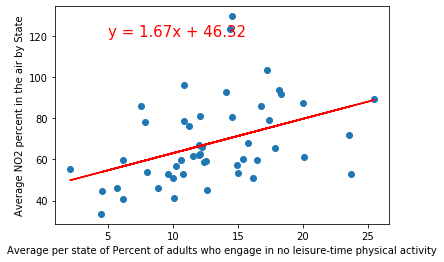

{'y = 1.67x + 46.32'}
The correlation between both factors is 0.41


In [26]:
# check if there is any correlation between percent of adults not engaging in leisure and average no2 in the air for the state

x_values = mergedq7_df.iloc[:,3]
y_values = mergedq7_df.iloc[:,4]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(5,120),fontsize=15,color="red")  # annotate 
plt.xlabel('Average per state of Percent of adults who engage in no leisure-time physical activity')
plt.ylabel('Average NO2 percent in the air by State')
print(f"The r-squared is: {rvalue}")
plt.show()
print({line_eq})


correlation = st.pearsonr(x_values ,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")


In [33]:
# The 2 df we want are q8 and clean_df


mergedq8_df=pd.merge(q8,clean_df, on="state")

mergedq8_df.head()


C:\ProgramData\Anaconda3\envs\PythinData\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\PythinData\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Question,state,Question - %Average,"(average, mean)","(Max Value, max)"
0,Percent of adults who report consuming fruit l...,Alabama,44.588000,16.133691,50.8
1,Percent of adults who report consuming fruit l...,Alaska,38.537500,17.845126,65.7
2,Percent of adults who report consuming fruit l...,Arizona,37.511111,23.549218,72.0
3,Percent of adults who report consuming fruit l...,Arkansas,44.064000,12.625227,45.0
4,Percent of adults who report consuming fruit l...,California,33.592593,14.378532,123.3


The r-squared is: 0.41122883735204824


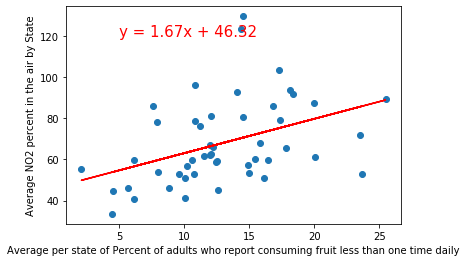

{'y = 1.67x + 46.32'}
The correlation between both factors is 0.41


In [34]:
# check if there is any correlation between Percent of adults who report consuming fruit less than one time daily and average no2 in the air for the state

x_values = mergedq8_df.iloc[:,3]
y_values = mergedq8_df.iloc[:,4]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(5,120),fontsize=15,color="red")  # annotate 
plt.xlabel('Average per state of Percent of adults who report consuming fruit less than one time daily')
plt.ylabel('Average NO2 percent in the air by State')
print(f"The r-squared is: {rvalue}")
plt.show()
print({line_eq})


correlation = st.pearsonr(x_values ,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [35]:
# The 2 df we want are q9 and clean_df


mergedq9_df=pd.merge(q9,clean_df, on="state")

mergedq9_df.head()





C:\ProgramData\Anaconda3\envs\PythinData\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\PythinData\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Question,state,Question - %Average,"(average, mean)","(Max Value, max)"
0,Percent of adults who report consuming vegetab...,Alabama,19.328000,16.133691,50.8
1,Percent of adults who report consuming vegetab...,Alaska,21.375000,17.845126,65.7
2,Percent of adults who report consuming vegetab...,Arizona,21.351852,23.549218,72.0
3,Percent of adults who report consuming vegetab...,Arkansas,21.012000,12.625227,45.0
4,Percent of adults who report consuming vegetab...,California,21.996296,14.378532,123.3


The r-squared is: 0.41122883735204824


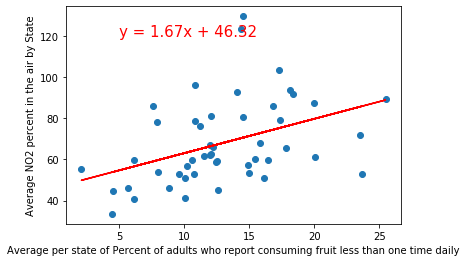

{'y = 1.67x + 46.32'}
The correlation between both factors is 0.41


In [36]:
# check if there is any correlation between Percent of adults who report consuming vegetables less than one time daily and average no2 in the air for the state

x_values = mergedq9_df.iloc[:,3]
y_values = mergedq9_df.iloc[:,4]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(5,120),fontsize=15,color="red")  # annotate 
plt.xlabel('Average per state of Percent of adults who report consuming fruit less than one time daily')
plt.ylabel('Average NO2 percent in the air by State')
print(f"The r-squared is: {rvalue}")
plt.show()
print({line_eq})


correlation = st.pearsonr(x_values ,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [54]:
# look at West Virginia, Mississippi, Oklahoma, Iowa, Lousiana, Arkansas 

# compare average air qualities and questions for these states 

# Get those states from both the clean_df and final_health_data

no2_obesity_df = clean_df.loc[(clean_df["state"] == "Oklahoma")|(clean_df["state"] == "Iowa")|(clean_df["state"] == "Arkansas")|(clean_df["state"] == "Lousiana")|(clean_df["state"] == "Mississippi"),:]

no2_obesity_df                              
                               
health_obesity_dfq7 = q7.loc[(q7["state"] == "Oklahoma")|(q7["state"] == "Iowa")|(q7["state"] == "Arkansas")|(q7["state"] == "Lousiana")|(q7["state"] == "Mississippi"),:]

health_obesity_dfq7                                                           
                               

,state,average,Max Value
,,mean,max
3,Arkansas,12.625227,45.0
15,Iowa,7.888254,78.4
24,Mississippi,9.603663,53.0
35,Oklahoma,11.982937,67.0


In [64]:
q7merged_df = pd.merge(health_obesity_dfq7 ,no2_obesity_df,on="state")

#del q7merged_df[('state', '')]

q7merged_df

C:\ProgramData\Anaconda3\envs\PythinData\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\PythinData\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Question,state,Question - %Average,"(average, mean)","(Max Value, max)"
0,Percent of adults who engage in no leisure-tim...,Arkansas,33.324000,12.625227,45.0
1,Percent of adults who engage in no leisure-tim...,Iowa,25.448000,7.888254,78.4
2,Percent of adults who engage in no leisure-tim...,Mississippi,33.575000,9.603663,53.0
3,Percent of adults who engage in no leisure-tim...,Oklahoma,31.773077,11.982937,67.0


The r-squared is: -0.65203616201284


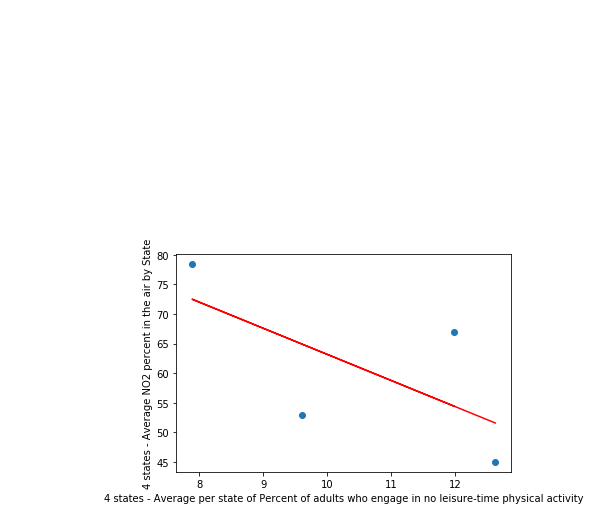

{'y = -4.42x + 107.36'}
The correlation between both factors is -0.65


In [66]:
# check if there is any correlation between percent of adults not engaging in leisure and average no2 in the air for the states where BMI > 30

# look at West Virginia, Mississippi, Oklahoma, Iowa, Lousiana, Arkansas 

x_values = q7merged_df.iloc[:,3]
y_values = q7merged_df.iloc[:,4]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(5,120),fontsize=15,color="red")  # annotate 
plt.xlabel('4 states - Average per state of Percent of adults who engage in no leisure-time physical activity')
plt.ylabel('4 states - Average NO2 percent in the air by State')
print(f"The r-squared is: {rvalue}")
plt.show()
print({line_eq})


correlation = st.pearsonr(x_values ,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")



